In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
import seaborn as sns

In [2]:
all_trails_info = pd.read_csv('national_park_trails.csv')

In [3]:
all_trails_info.head()

,trail_id,name,area_name,city_name,state_name,country_name,_geoloc,popularity,length,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,num_reviews,features,activities,units
0,10020048,Harding Ice Field Trail,Kenai Fjords National Park,Seward,Alaska,United States,"{'lat': 60.18852, 'lng': -149.63156}",24.8931,15610.598,1161.8976,5,out and back,3.0,5.0,423,"['dogs-no', 'forest', 'river', 'views', 'water...","['birding', 'camping', 'hiking', 'nature-trips...",i
1,10236086,Mount Healy Overlook Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73049, 'lng': -148.91968}",18.0311,6920.162,507.7968,3,out and back,1.0,4.5,260,"['dogs-no', 'forest', 'views', 'wild-flowers',...","['birding', 'camping', 'hiking', 'nature-trips...",i
2,10267857,Exit Glacier Trail,Kenai Fjords National Park,Seward,Alaska,United States,"{'lat': 60.18879, 'lng': -149.631}",17.7821,2896.812,81.9912,1,out and back,3.0,4.5,224,"['dogs-no', 'partially-paved', 'views', 'wildl...","['hiking', 'walking']",i
3,10236076,Horseshoe Lake Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73661, 'lng': -148.915}",16.2674,3379.614,119.7864,1,loop,2.0,4.5,237,"['dogs-no', 'forest', 'lake', 'kids', 'views',...","['birding', 'hiking', 'nature-trips', 'trail-r...",i
4,10236082,Triple Lakes Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73319, 'lng': -148.89682}",12.5935,29772.790,1124.7120,5,out and back,1.0,4.5,110,"['dogs-no', 'lake', 'views', 'wild-flowers', '...","['birding', 'fishing', 'hiking', 'nature-trips...",i


In [4]:
print(all_trails_info.dtypes)

trail_id               int64
name                  object
area_name             object
city_name             object
state_name            object
country_name          object
_geoloc               object
popularity           float64
length               float64
elevation_gain       float64
difficulty_rating      int64
route_type            object
visitor_usage        float64
avg_rating           float64
num_reviews            int64
features              object
activities            object
units                 object
dtype: object


In [5]:
all_trails_info.describe()

,trail_id,popularity,length,elevation_gain,difficulty_rating,visitor_usage,avg_rating,num_reviews
count,3.313000e+03,3313.000000,3313.000000,3313.000000,3313.000000,3060.000000,3313.000000,3313.000000
mean,1.018506e+07,8.953441,17676.848717,641.805943,3.167824,1.877124,4.173106,70.341986
std,1.503248e+05,8.138323,25497.376640,901.506642,1.702752,0.693641,0.947039,184.118370
min,1.000001e+07,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,1.002853e+07,3.794100,4506.152000,116.738400,1.000000,1.000000,4.000000,5.000000
50%,1.023781e+07,6.573100,10621.644000,359.968800,3.000000,2.000000,4.500000,17.000000
75%,1.029234e+07,11.255600,21404.222000,833.932800,5.000000,2.000000,4.500000,57.000000
max,1.054542e+07,84.622900,529794.728000,14029.944000,7.000000,4.000000,5.000000,3903.000000


In [6]:
corr_matrix = all_trails_info.corr()

<AxesSubplot:>

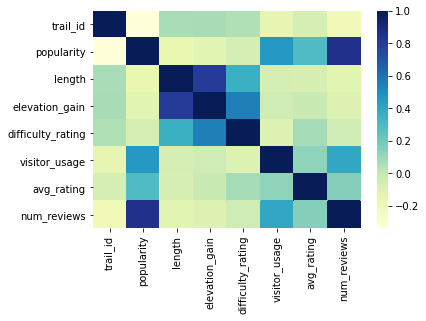

In [7]:
sns.heatmap(corr_matrix, cmap="YlGnBu")

In [8]:
all_trails_info.isnull().sum()

trail_id               0
name                   0
area_name              0
city_name              0
state_name             0
country_name           0
_geoloc                0
popularity             0
length                 0
elevation_gain         0
difficulty_rating      0
route_type             0
visitor_usage        253
avg_rating             0
num_reviews            0
features               0
activities             0
units                  0
dtype: int64

In [9]:
all_trails_info.shape

(3313, 18)

In [10]:
no_visitors = all_trails_info[all_trails_info['visitor_usage'] == 0]

In [11]:
no_visitors

,trail_id,name,area_name,city_name,state_name,country_name,_geoloc,popularity,length,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,num_reviews,features,activities,units


In [16]:
print(list(all_trails_info))

['trail_id', 'name', 'area_name', 'city_name', 'state_name', 'country_name', '_geoloc', 'popularity', 'length', 'elevation_gain', 'difficulty_rating', 'route_type', 'visitor_usage', 'avg_rating', 'num_reviews', 'features', 'activities', 'units']


In [69]:
all_activities=all_trails_info['activities']
unique_activities=[]
for index,row in all_trails_info.iterrows():
    res=row['activities'].strip('[]').strip("''").split(', ')
    for item in res:
        if res not in unique_activities:
            unique_activities.append(res)
            print(res)

["birding'", "'camping'", "'hiking'", "'nature-trips'", "'trail-running"]
["birding'", "'camping'", "'hiking'", "'nature-trips'", "'walking"]
["hiking'", "'walking"]
["birding'", "'hiking'", "'nature-trips'", "'trail-running'", "'walking"]
["birding'", "'fishing'", "'hiking'", "'nature-trips'", "'trail-running"]
["hiking'", "'nature-trips"]
['hiking']
["birding'", "'hiking'", "'nature-trips'", "'walking"]
["backpacking'", "'camping'", "'hiking'", "'nature-trips"]
["birding'", "'hiking'", "'nature-trips'", "'walking'", "'sea-kayaking"]
["hiking'", "'trail-running"]
["hiking'", "'trail-running'", "'canoeing"]
["hiking'", "'nature-trips'", "'trail-running'", "'walking"]
["hiking'", "'nature-trips'", "'walking"]
["hiking'", "'nature-trips'", "'trail-running"]
["hiking'", "'mountain-biking'", "'nature-trips'", "'walking"]
["backpacking'", "'hiking"]
["birding'", "'camping'", "'hiking'", "'nature-trips'", "'walking'", "'horseback-riding"]
["backpacking'", "'birding'", "'hiking'", "'nature-tr